In [3]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


from src.path_loss import PathLossInHIndoorOffice, PathLossInHShoppingMalls
from src.network_sim import NetworkSimulator
from src.algorithm import stochastic_wmmse
from src.experiment import ExperimentInterferenceModelComparison

%reload_ext autoreload
%autoreload 2
%aimport src

In [6]:
frequency_Hz = 60 * 1e09
distance_m = 200
sample_size=10

pd.DataFrame({
    'PathLossInHIndoorOffice':[PathLossInHIndoorOffice().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMalls': [PathLossInHShoppingMalls().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
})

,PathLossInHIndoorOffice,PathLossInHShoppingMalls
0,-167.745895,-139.725211
1,-165.070191,-146.596121
2,-162.616132,-147.839685
3,-172.487623,-144.091690
4,-155.261612,-149.431424
5,-156.240718,-136.462326
6,-157.553476,-139.692589
7,-156.019775,-149.647577
8,-161.437120,-140.139875
9,-156.629381,-143.298081


In [11]:
simulator = NetworkSimulator(Tx_radius=200, Rx_radius=25, num_Tx_netA=5, num_Rx_per_Tx_netA=10, num_Tx_netB=5, num_Rx_per_Tx_netB=10)

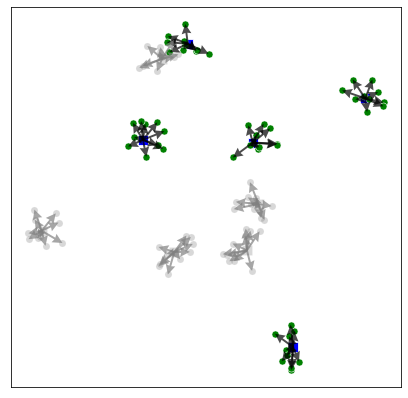

In [12]:
simulator.plot_network()

In [13]:
pd.DataFrame(simulator.gain_mat_dBm)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-112.471455,-95.751809,-88.868095,-94.565951,-102.077939,-103.507686,-81.887218,-76.127523,-104.981382,-94.569266,...,-168.884894,-165.855991,-160.427806,-153.240041,-166.276824,-174.292692,-176.052454,-157.021113,-155.647080,-174.387122
1,-149.181048,-147.686974,-146.704781,-155.459102,-146.420682,-143.889226,-147.292373,-147.745621,-163.248360,-157.568567,...,-130.328924,-125.882627,-117.415188,-127.962061,-120.394937,-134.687455,-127.318513,-132.604039,-130.936272,-137.446544
2,-130.238076,-135.668416,-136.142521,-138.702896,-132.685307,-132.452495,-141.675230,-140.528759,-137.642752,-132.346258,...,-140.895363,-155.780924,-140.612845,-153.811789,-108.699071,-146.517778,-163.554146,-143.382898,-162.680205,-150.980011
3,-152.374738,-165.596947,-159.364859,-158.875865,-156.718560,-162.998211,-164.543778,-156.519996,-155.667969,-149.776126,...,-161.790842,-158.929324,-163.021400,-174.460609,-156.070297,-151.536043,-145.464243,-146.801037,-154.917240,-164.668370
4,-115.612119,-126.526946,-135.185898,-125.718894,-117.144408,-119.020474,-115.170818,-124.650249,-123.726854,-119.276963,...,-150.308918,-148.946353,-135.718329,-152.741909,-143.874280,-157.173722,-143.023687,-139.508337,-147.045805,-144.645913
5,-157.455501,-154.674905,-153.304781,-150.830921,-146.603143,-152.127664,-153.442720,-158.019214,-141.028695,-157.085238,...,-135.776142,-116.783252,-129.057351,-127.496353,-118.458402,-127.895447,-118.468919,-115.384923,-125.996181,-126.785240
6,-136.925393,-144.502600,-157.043477,-146.967500,-140.613290,-150.074018,-151.747081,-141.868239,-146.058066,-146.454850,...,-139.881100,-135.334667,-134.301941,-144.933853,-147.529343,-151.813329,-146.990938,-141.332398,-153.341126,-140.869695
7,-145.545356,-136.982304,-135.854270,-142.307299,-140.705291,-142.627338,-139.466429,-144.695133,-151.450708,-144.750971,...,-141.263511,-154.765267,-137.538266,-145.209868,-154.000874,-143.775843,-152.952484,-139.851437,-156.203056,-145.981481
8,-123.561483,-125.729502,-141.549374,-133.413691,-121.217979,-154.920966,-128.105444,-132.453170,-130.413786,-129.217341,...,-144.633237,-138.904522,-136.910369,-149.115004,-141.767868,-145.458553,-149.091230,-148.379865,-158.190149,-145.710878
9,-173.166674,-163.585554,-170.661743,-171.604659,-166.785438,-168.023670,-163.215280,-166.424329,-170.895263,-160.992070,...,-98.493096,-111.411202,-93.291772,-104.200526,-89.330391,-98.353747,-93.946456,-101.901167,-105.653157,-93.819262


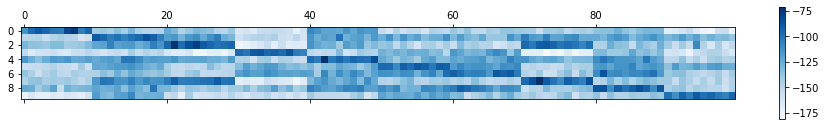

In [14]:
simulator.plot_gain_mat()

## Model Comparisons

In [34]:
simulator.weighted_sum_rate_Gnats([1e-10 for i in range(simulator.num_Rx)], Rx_weights=np.ones(simulator.num_Rx), part='A')

0.0005961154390527579

In [19]:
model_comparison = ExperimentInterferenceModelComparison(simulator=simulator)
model_comparison.data_generation(num_samples=1, max_power=200, netB_power_mode='dependent')
model_comparison.modeling()

In [20]:
model_comparison.run(num_rounds=100, netA_power_mode='random', netB_power_mode='zero')

,interference,sc_bias,lr_bias
0,0.000004,-0.111508,-0.028116


In [21]:
model_comparison.run(num_rounds=100, netA_power_mode='random', netB_power_mode='dependent')

,interference,sc_bias,lr_bias
0,0.000004,-0.112047,-0.044314


In [22]:
model_comparison.run(num_rounds=100, netA_power_mode='random', netB_power_mode='dependent')

,interference,sc_bias,lr_bias
0,0.000004,-0.120682,-0.023281


In [23]:
model_comparison.run(num_rounds=100, netA_power_mode='random', netB_power_mode='uniform')

,interference,sc_bias,lr_bias
0,0.000004,-0.114715,-0.030759


## Algorithm Comparisons

In [25]:
max_power = 200
netB_power_training_mode = 'dependent' # ['dependent', 'zero', 'random']
netB_power_testing_mode = 'dependent' # ['dependent', 'zero', 'random', 'uniform']

max_iterations = 500

model_comparison = ExperimentInterferenceModelComparison(simulator=simulator)
model_comparison.data_generation(num_samples=1000, max_power=max_power, netB_power_mode=netB_power_training_mode)
model_comparison.modeling(synthetic_constrained=True)
starting_powers_mW = [1e-5 for i in range(simulator.num_Rx)]
# Rx_weights = np.random.uniform(0.1, 1, simulator.num_Rx)
Rx_weights = np.ones(simulator.num_Rx)

In [26]:
rates_original_method = stochastic_wmmse(
    simulator=simulator,
    Rx_powers_mW=starting_powers_mW,
    Rx_max_powers_mW=max_power,
    Rx_weights=Rx_weights,
    interference_mode='original',
    interference_models=[],
    netB_power_mode = netB_power_testing_mode,
    power_corr_mat=model_comparison.power_corr_mat,
    max_iter=max_iterations,
);

In [27]:
rates_local_method = stochastic_wmmse(
    simulator=simulator,
    Rx_powers_mW=starting_powers_mW,
    Rx_max_powers_mW=max_power,
    Rx_weights=Rx_weights,
    interference_mode='local',
    interference_models=model_comparison.lr_models,
    netB_power_mode = netB_power_testing_mode,
    power_corr_mat=model_comparison.power_corr_mat,
    max_iter=max_iterations,
);

In [28]:
rates_sc_method = stochastic_wmmse(
    simulator=simulator,
    Rx_powers_mW=starting_powers_mW,
    Rx_max_powers_mW=max_power,
    Rx_weights=Rx_weights,
    interference_mode='sc_estimate',
    interference_models=model_comparison.sc_models,
    netB_power_mode = netB_power_testing_mode,
    power_corr_mat=model_comparison.power_corr_mat,
    max_iter=max_iterations,
);

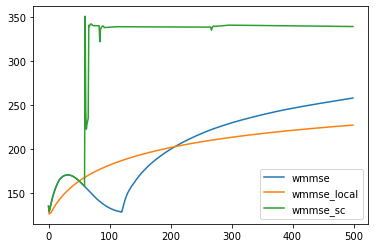

In [29]:
data = pd.DataFrame({
    'wmmse': rates_original_method,
    'wmmse_local': rates_local_method,
    'wmmse_sc': rates_sc_method,
})
data.plot();